## Import necessary libraries
---



---

In [14]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
from textblob import TextBlob
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split




## Load cleaned and preprocessed data
---



---

In [2]:
tweet = pd.read_csv('/Users/pranavkhot/Documents/NLP/data/processed_data/preprocessed_data.csv')

## Extracting Top Tweets
### Extracting the top 5 tweets based on the favourites count, the tweets are sorted in descending order and displayed.
---



---

In [3]:
# Select top 5 tweets sorted by favourites count
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
tabulated_fav_data = [[i+1, fav['favourites_count'][i], fav['text'][i]] for i in range(5)]
fav_table = tabulate(tabulated_fav_data, headers=['Rank', 'Favourites Count', 'Text'], tablefmt='fancy_grid')
print(fav_table)

╒════════╤════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   Rank │   Favourites Count │ Text                                                                                                                                                                                                                                                                 │
╞════════╪════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│      1 │             684015 │ covid19 stands still for no one we re here we re together we re strong and we re re

## Extracting Top Retweeted Tweets
### Extracting the top 5 tweets with the highest retweet counts
---



---

In [4]:
# Select top 5 tweets sorted by retweet count
retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
tabulated_data = [[i+1, retweet['retweet_count'][i], retweet['text'][i]] for i in range(5)]
retweet_table = tabulate(tabulated_data, headers=['Rank', 'Retweet Count', 'Text'], tablefmt='fancy_grid')
print(retweet_table)

╒════════╤═════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   Rank │   Retweet Count │ Text                                                                                                                                                                                                                                                                            │
╞════════╪═════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│      1 │            2098 │ this lady is working in a icu deptt in hospital where covid pa

##  Tweets Distribution per Hour
### Visualizing the number of tweets per hour, it helps in understanding the time when the tweeting activity was at its peak.
---



---

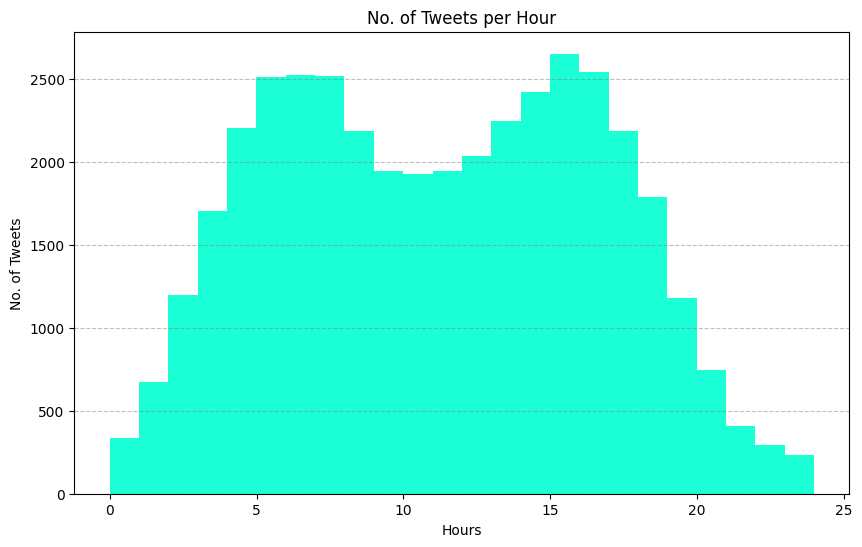

In [5]:
import matplotlib.pyplot as plt

# Plotting number of Tweets/Hour using histogram format
plt.figure(figsize=(10,6))
plt.hist(tweet["created_at"], bins=24, color='#1affd5')  
plt.xlabel('Hours')
plt.ylabel('No. of Tweets')
plt.title('No. of Tweets per Hour')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.show()


## Word Cloud
### Visualizing the most frequent words in the dataset using a word cloud.
---



---

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavkhot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


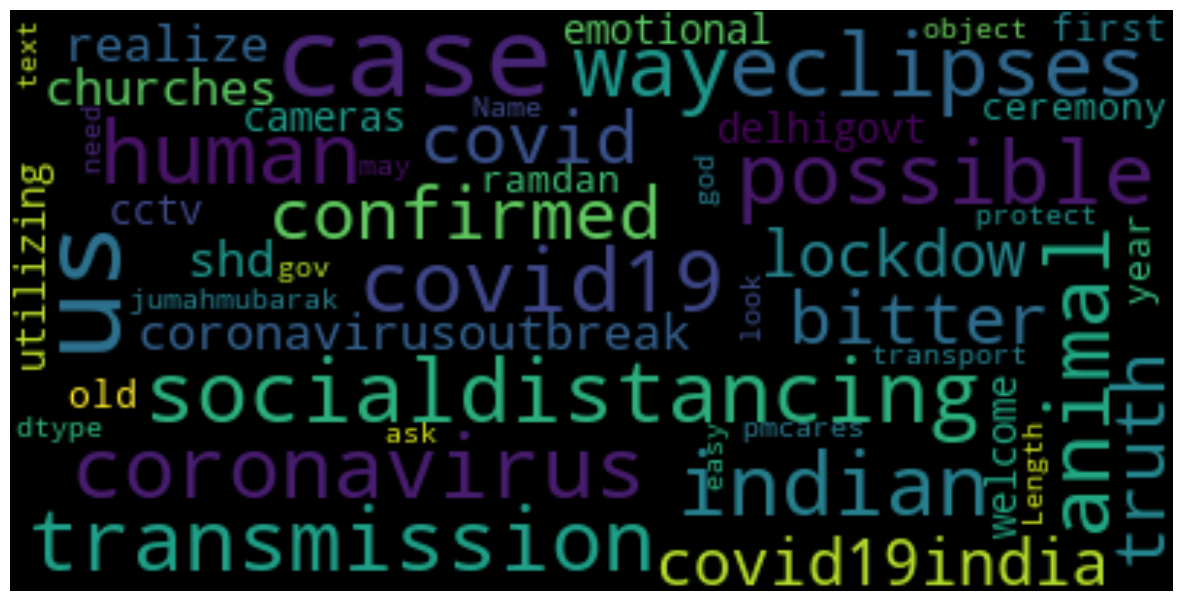

In [18]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,  # Use stop_words instead of stopwords
        max_words=200,
        max_font_size=40
    ).generate(str(data))

    plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        plt.title(title, size=25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
show_wordcloud(tweet['text'])


## Sentiment Analysis
### Calculates the polarity of tweets and assigns a sentiment label (positive, negative, or neutral).
---



---

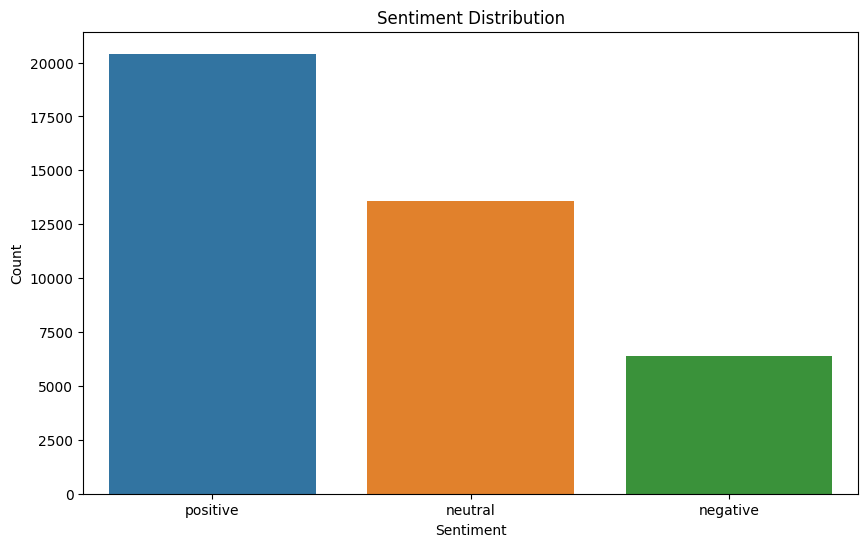

╒═════════════╤═════════╕
│ Sentiment   │   Count │
╞═════════════╪═════════╡
│ positive    │   20408 │
├─────────────┼─────────┤
│ neutral     │   13589 │
├─────────────┼─────────┤
│ negative    │    6388 │
╘═════════════╧═════════╛


In [26]:
from textblob import TextBlob

# Calculate polarity and assign sentiment
tweet['polarity'] = tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweet['sentiment'] = tweet['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
sentiment_counts = tweet['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
sentiment_table = tabulate(sentiment_counts, headers='keys', tablefmt='fancy_grid', showindex=False)

# Plot Sentiment Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment', data=tweet, order=tweet['sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print(sentiment_table)

tweet.to_csv('/Users/pranavkhot/Documents/NLP/data/processed_data/final_data.csv', index=False, encoding='utf-8')



## Sentiment Word Cloud
### Visualizing the words associated with each sentiment category.
---



---

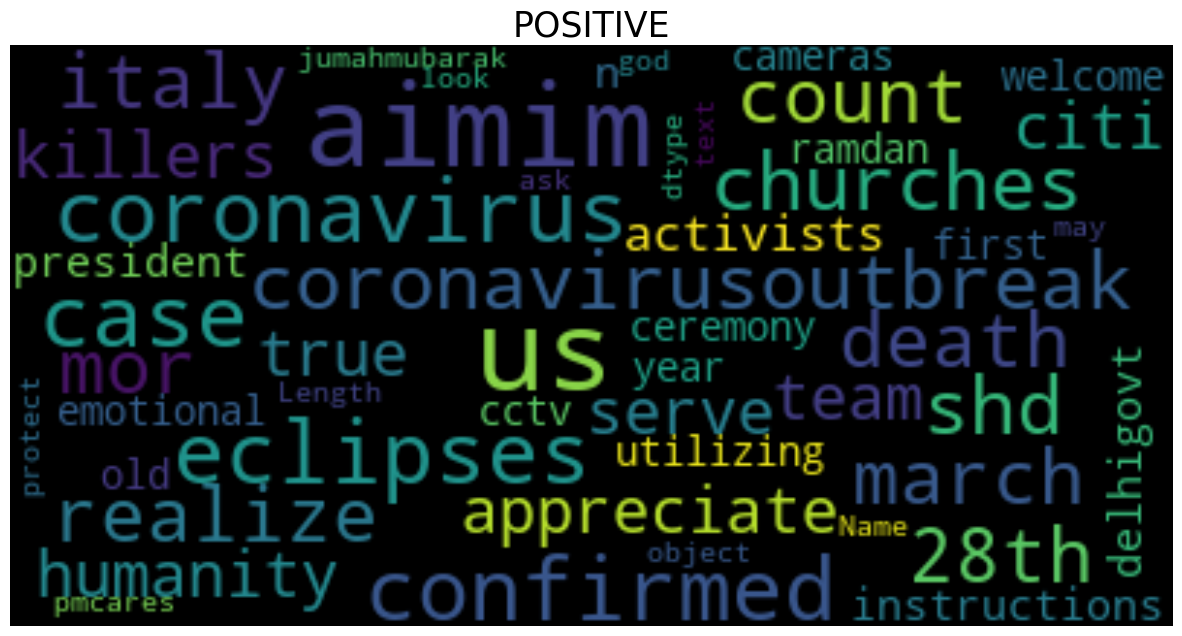

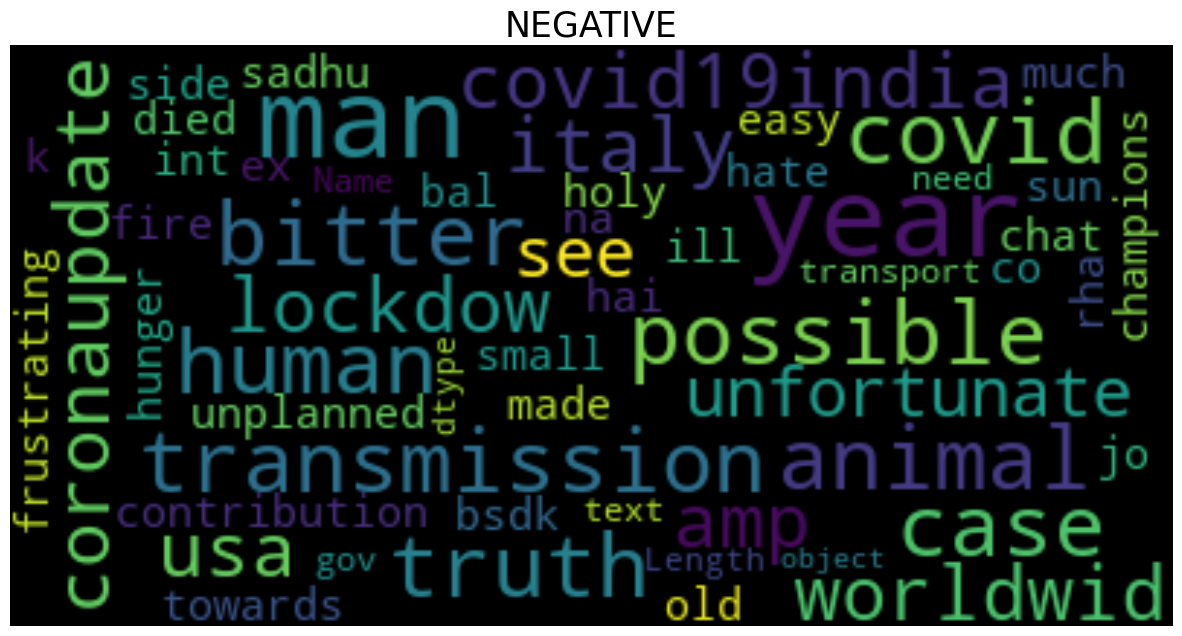

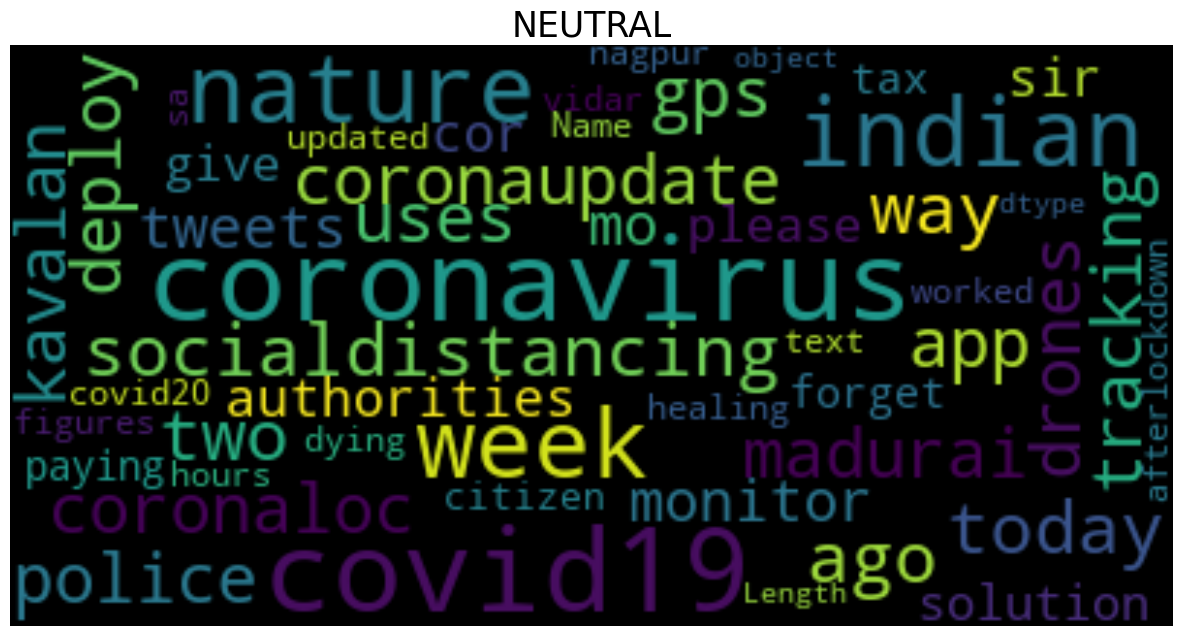

In [20]:
# Show word cloud for each sentiment
show_wordcloud(tweet['text'][tweet['sentiment'] == 'positive'], 'POSITIVE')
show_wordcloud(tweet['text'][tweet['sentiment'] == 'negative'], 'NEGATIVE')
show_wordcloud(tweet['text'][tweet['sentiment'] == 'neutral'], 'NEUTRAL')

## Word Frequencies
### Calculating the frequency of words in the cleaned tweets and visualizes the top words in a bar chart.
---



---

╒══════════════════╤═════════════╕
│ word             │   frequency │
╞══════════════════╪═════════════╡
│ the              │       27205 │
├──────────────────┼─────────────┤
│ to               │       25849 │
├──────────────────┼─────────────┤
│ of               │       20393 │
├──────────────────┼─────────────┤
│ in               │       18068 │
├──────────────────┼─────────────┤
│ covid19          │       15333 │
├──────────────────┼─────────────┤
│ and              │       14501 │
├──────────────────┼─────────────┤
│ covid            │       13446 │
├──────────────────┼─────────────┤
│ coronavirus      │       13203 │
├──────────────────┼─────────────┤
│ 19               │       11536 │
├──────────────────┼─────────────┤
│ is               │       11227 │
├──────────────────┼─────────────┤
│ a                │       10834 │
├──────────────────┼─────────────┤
│ for              │       10662 │
├──────────────────┼─────────────┤
│ this             │        8121 │
├──────────────────┼

<Axes: xlabel='frequency', ylabel='word'>

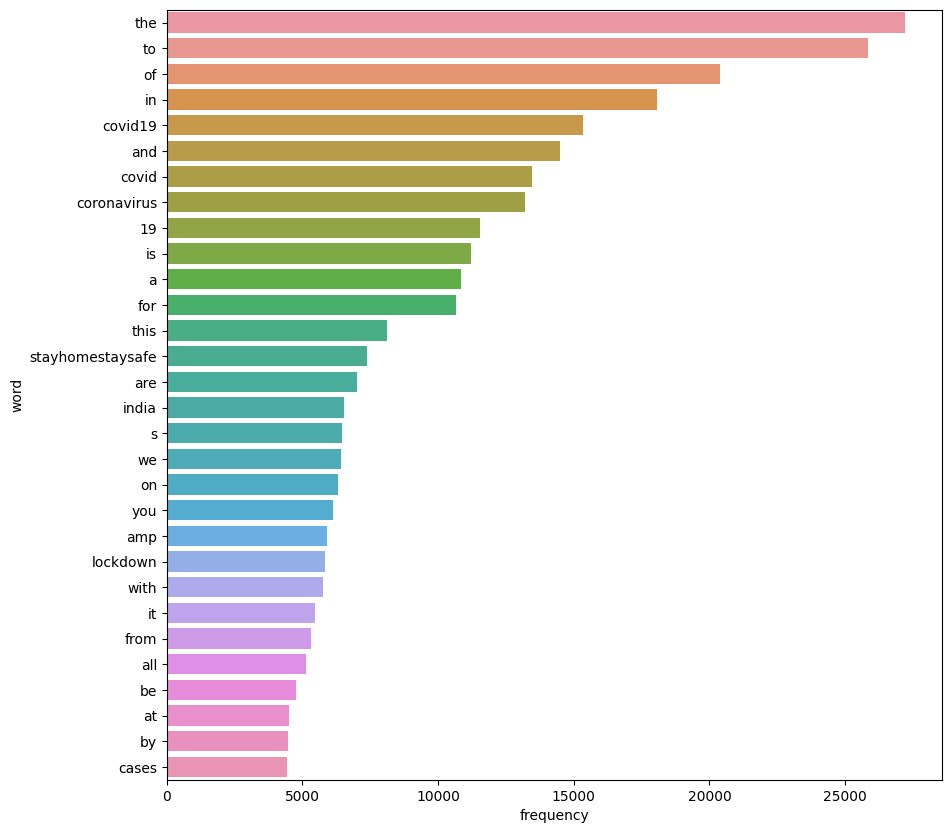

In [21]:
from collections import Counter

# Extracting words and calculating their frequencies
words = [word for i in tweet.text for word in i.split()]
word_frequencies = Counter(words).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['word', 'frequency'])
word_freq_table = tabulate(word_freq_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(word_freq_table)

# Plotting word frequencies
plt.figure(figsize=(10, 10))
sns.barplot(y="word", x="frequency", data=word_freq_df)


## Distribution of Tweet Lengths
### Visualizing the distribution of the lengths of tweets in the dataset.
---



---

<Figure size 1200x600 with 0 Axes>

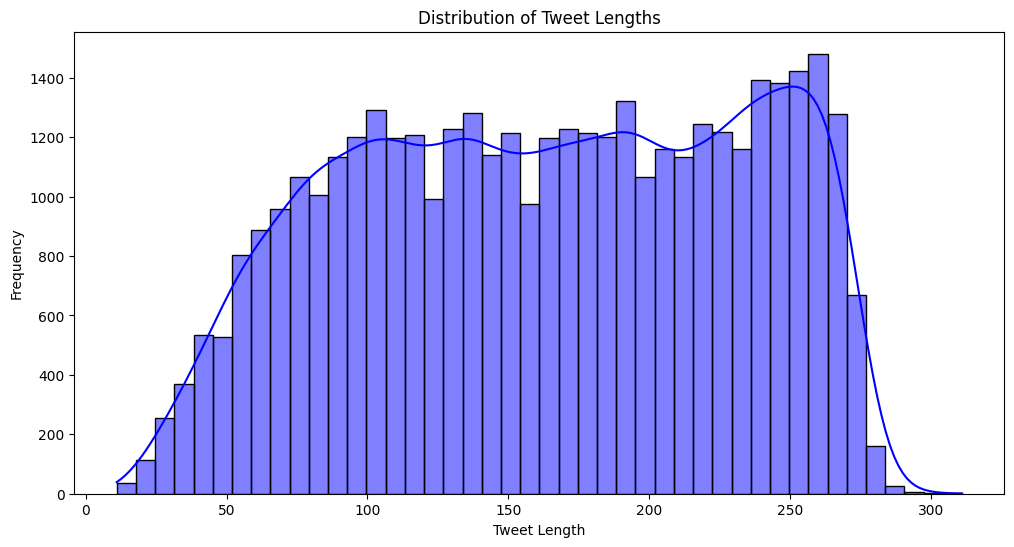

In [22]:
# Analyze the distribution of the lengths of tweets
tweet['tweet_length'] = tweet['text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(12,6))

# Plotting the distribution of tweet lengths
plt.figure(figsize=(12,6))
sns.histplot(tweet['tweet_length'], kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


## Extracting Bigrams and Trigrams
### Extracting bigrams and trigrams from the cleaned tweets and calculates their frequencies. The bigrams are visualized in a horizontal bar plot with their counts to understand the co-occurrence of words.

---



---

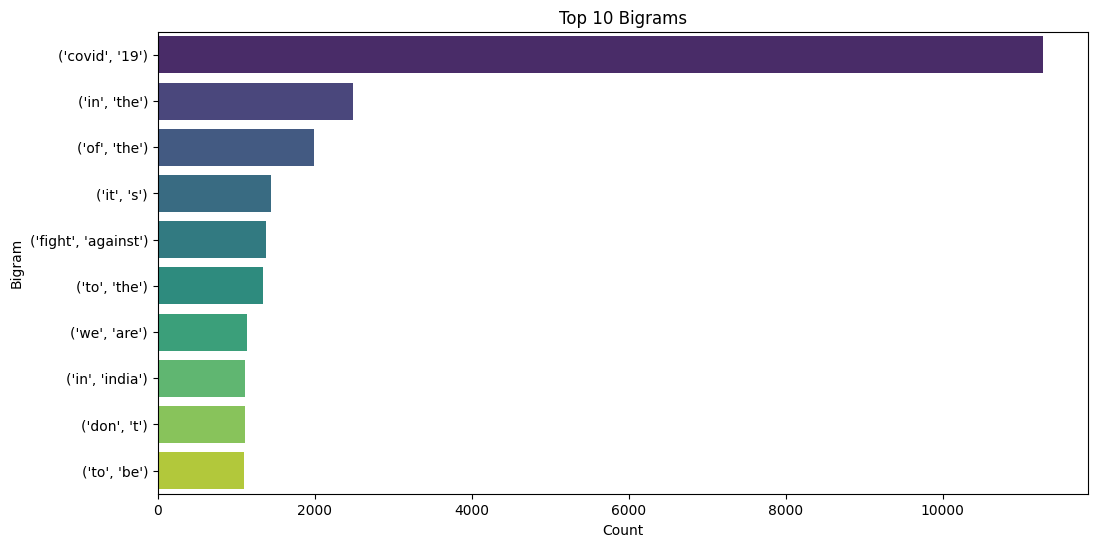

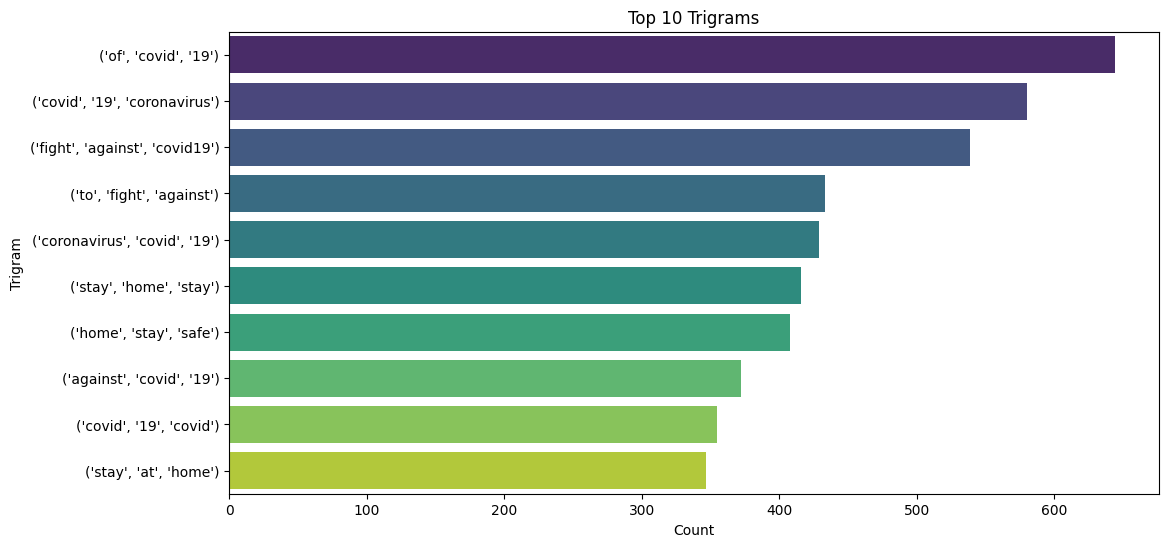

In [25]:
from nltk.util import ngrams
from collections import Counter

# Extracting bigrams and trigrams
bigrams = list(ngrams(' '.join(tweet['text']).split(), 2))
trigrams = list(ngrams(' '.join(tweet['text']).split(), 3))

# Getting frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Extracting top 10 bigrams and trigrams
top_bigrams = bigram_freq.most_common(10)
top_trigrams = trigram_freq.most_common(10)

# Plotting top bigrams
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')
plt.title('Top 10 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

# Plotting top trigrams
trigram_df = pd.DataFrame(top_trigrams, columns=['trigram', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='trigram', data=trigram_df, palette='viridis')
plt.title('Top 10 Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

